<!-- Autogenerated by `scripts/make_examples.py` -->
<table align="left">
    <td>
        <a target="_blank" href="https://colab.research.google.com/github/voxel51/fiftyone-examples/blob/master/examples/3D Detections.ipynb">
            <img src="https://user-images.githubusercontent.com/25985824/104791629-6e618700-5769-11eb-857f-d176b37d2496.png" height="32" width="32">
            Try in Google Colab
        </a>
    </td>
    <td>
        <a target="_blank" href="https://nbviewer.jupyter.org/github/voxel51/fiftyone-examples/blob/master/examples/3D Detections.ipynb">
            <img src="https://user-images.githubusercontent.com/25985824/104791634-6efa1d80-5769-11eb-8a4c-71d6cb53ccf0.png" height="32" width="32">
            Share via nbviewer
        </a>
    </td>
    <td>
        <a target="_blank" href="https://github.com/voxel51/fiftyone-examples/blob/master/examples/3D Detections.ipynb">
            <img src="https://user-images.githubusercontent.com/25985824/104791633-6efa1d80-5769-11eb-8ee3-4b2123fe4b66.png" height="32" width="32">
            View on GitHub
        </a>
    </td>
    <td>
        <a href="https://github.com/voxel51/fiftyone-examples/raw/master/examples/3D Detections.ipynb" download>
            <img src="https://user-images.githubusercontent.com/25985824/104792428-60f9cc00-576c-11eb-95a4-5709d803023a.png" height="32" width="32">
            Download notebook
        </a>
    </td>
</table>


Dataset already downloaded
Loading 'quickstart-groups'
 100% |█████████████████| 600/600 [1.7s elapsed, 0s remaining, 353.5 samples/s]         
Dataset 'quickstart-groups' created



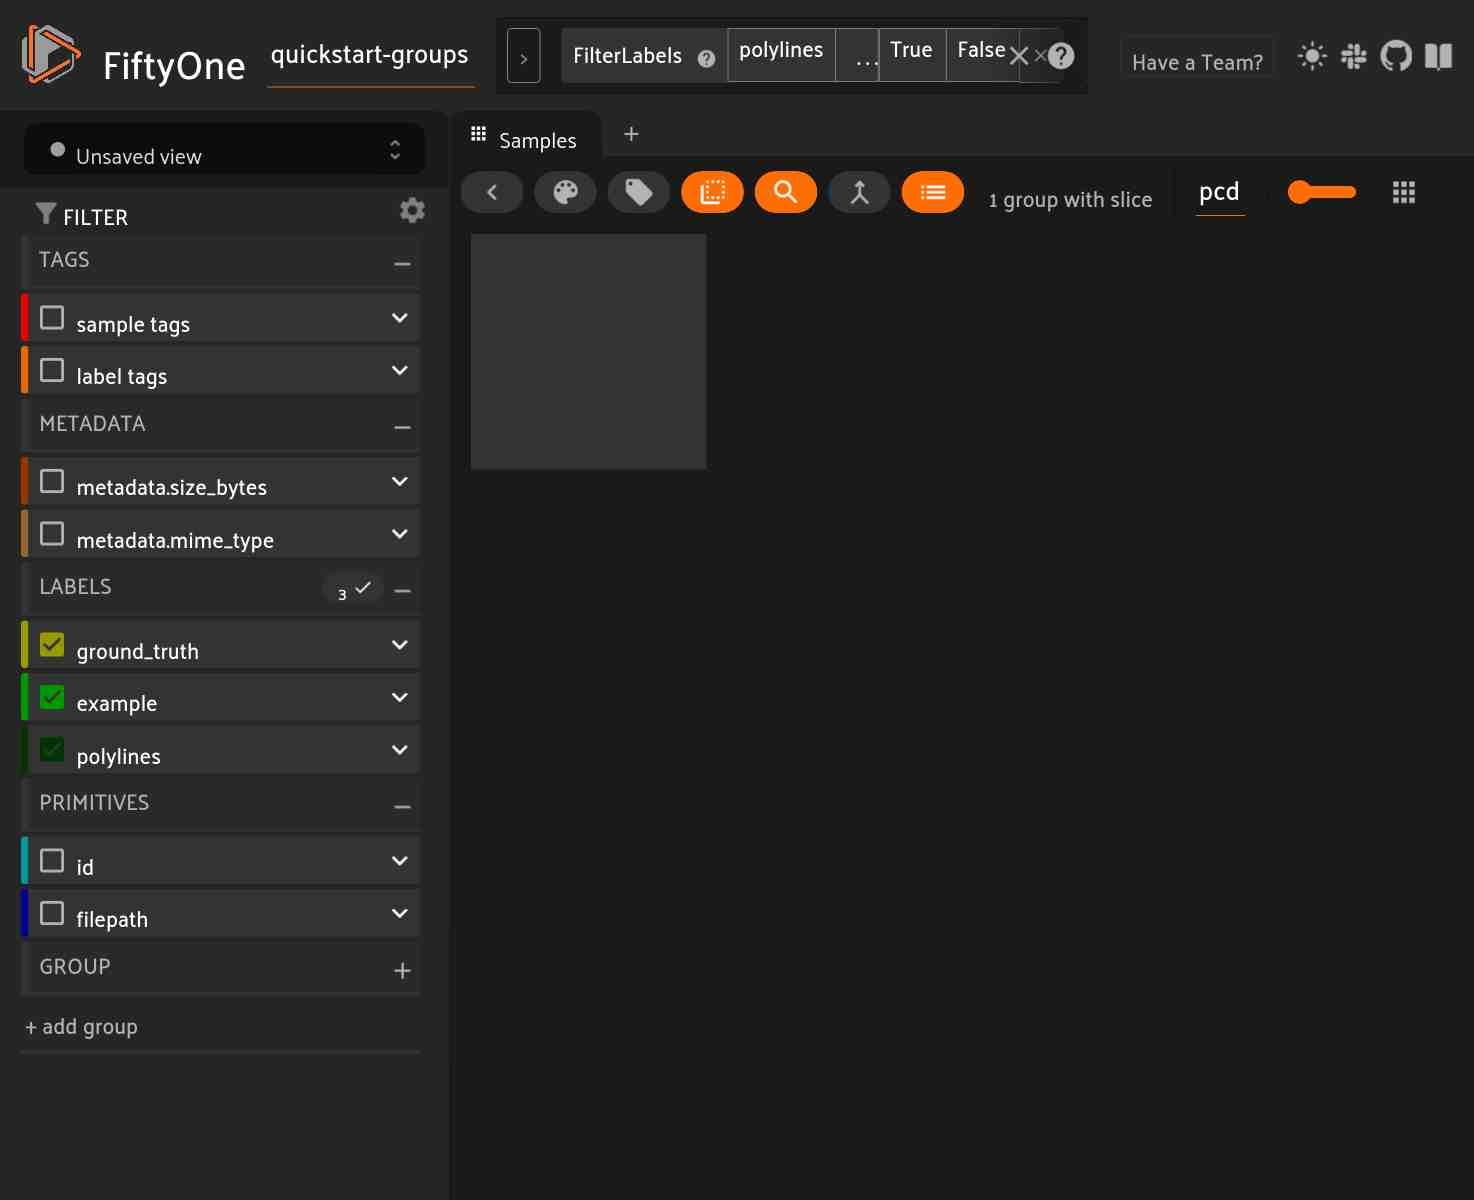

In [2]:
import fiftyone as fo
import fiftyone.zoo as foz
from fiftyone import ViewField as F

dataset = foz.load_zoo_dataset("quickstart-groups") 
session = fo.launch_app(dataset)


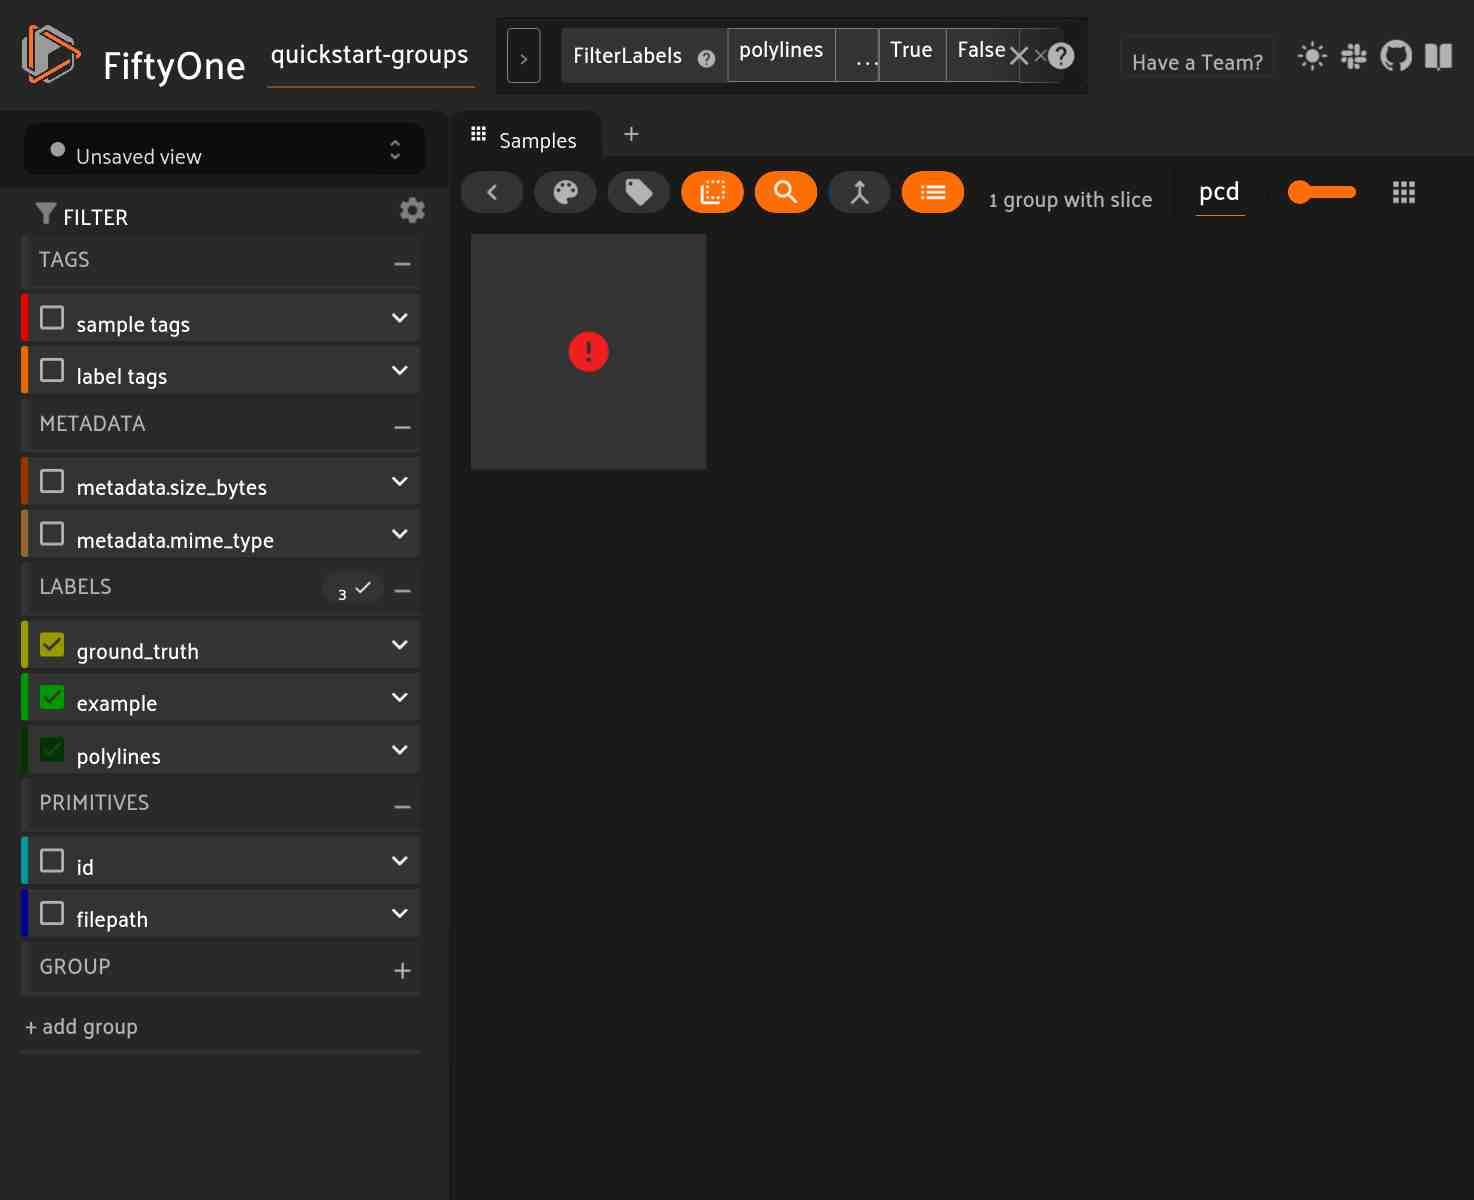

In [3]:
dataset.group_slice = "pcd"
sample = dataset.first()

bounding_box = fo.Detection(
                label="example",
                location=[0,0,0],
                rotation=[0, 0, 0],
                dimensions=[3,3,3]
                )

sample["example"]= bounding_box
sample.save()
dataset.save()
view =  dataset.filter_labels(
    "example", F("label").is_in(["example"])
)

session.view = view


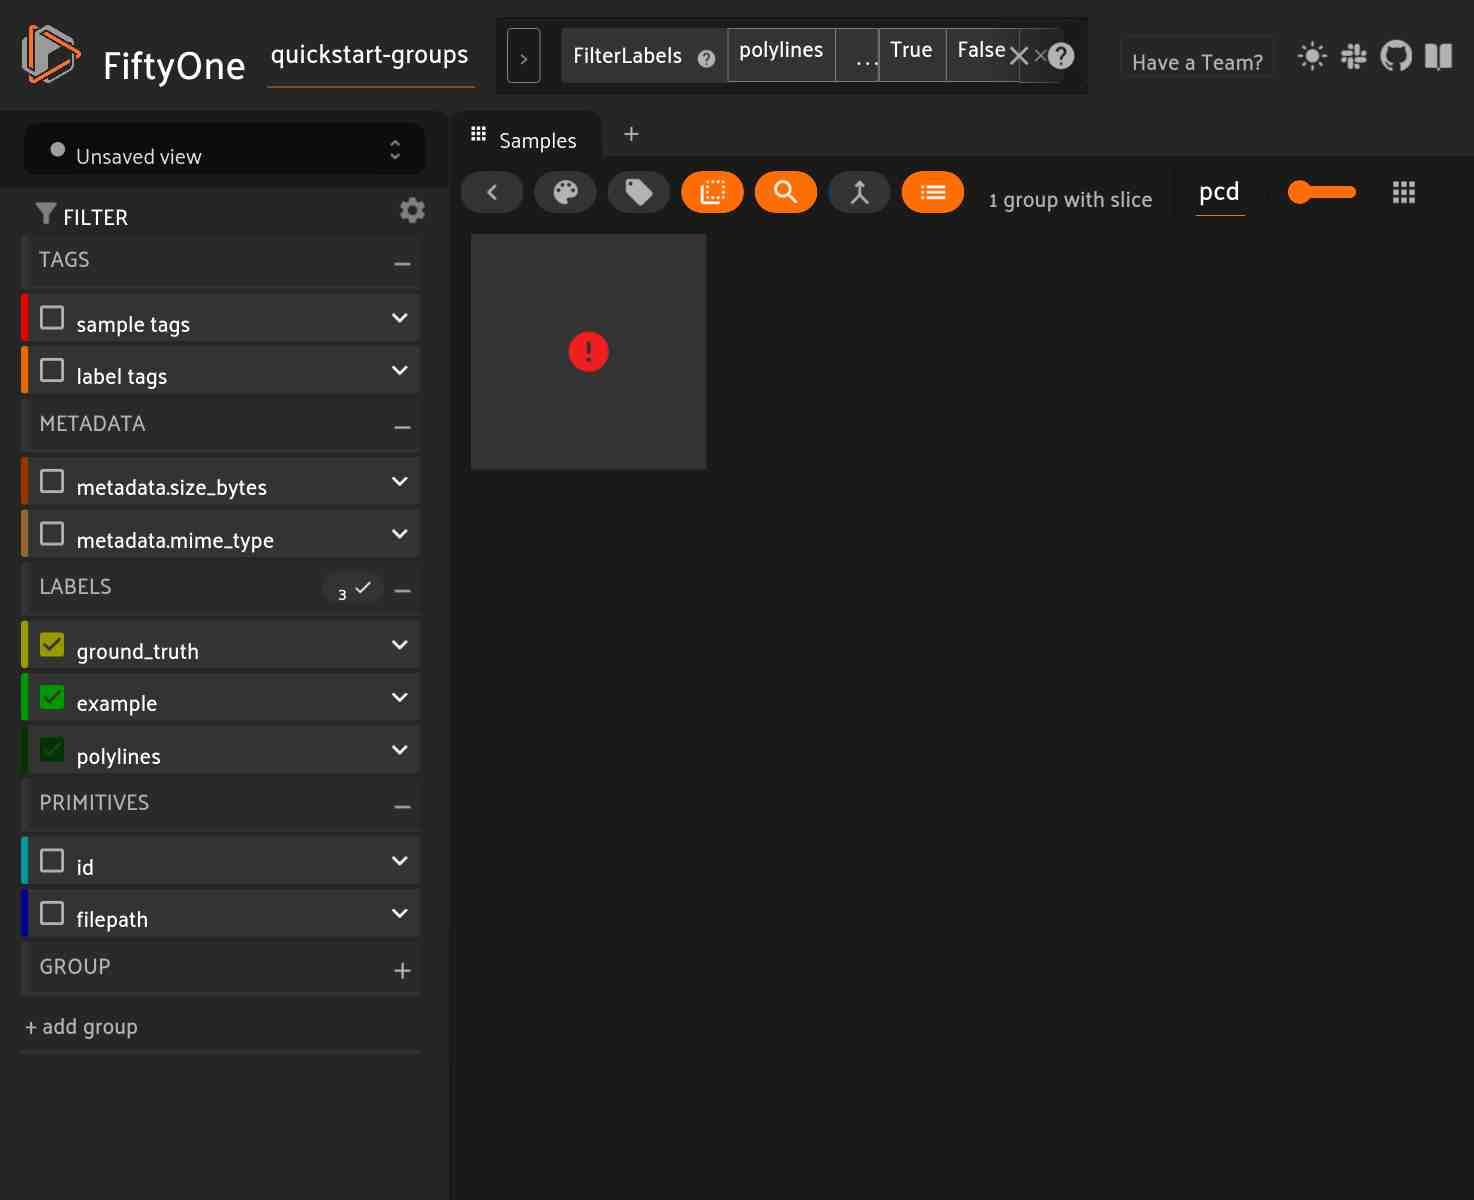

In [4]:
sample = dataset.first()

bounding_box = fo.Detection(
                label="example",
                location=[0,2,4],
                rotation=[0, 0, 0],
                dimensions=[1,2,3]
                )

sample["example"]= bounding_box
sample.save()
dataset.save()

view =  dataset.filter_labels(
    "example", F("label").is_in(["example"])
)

session.view = view


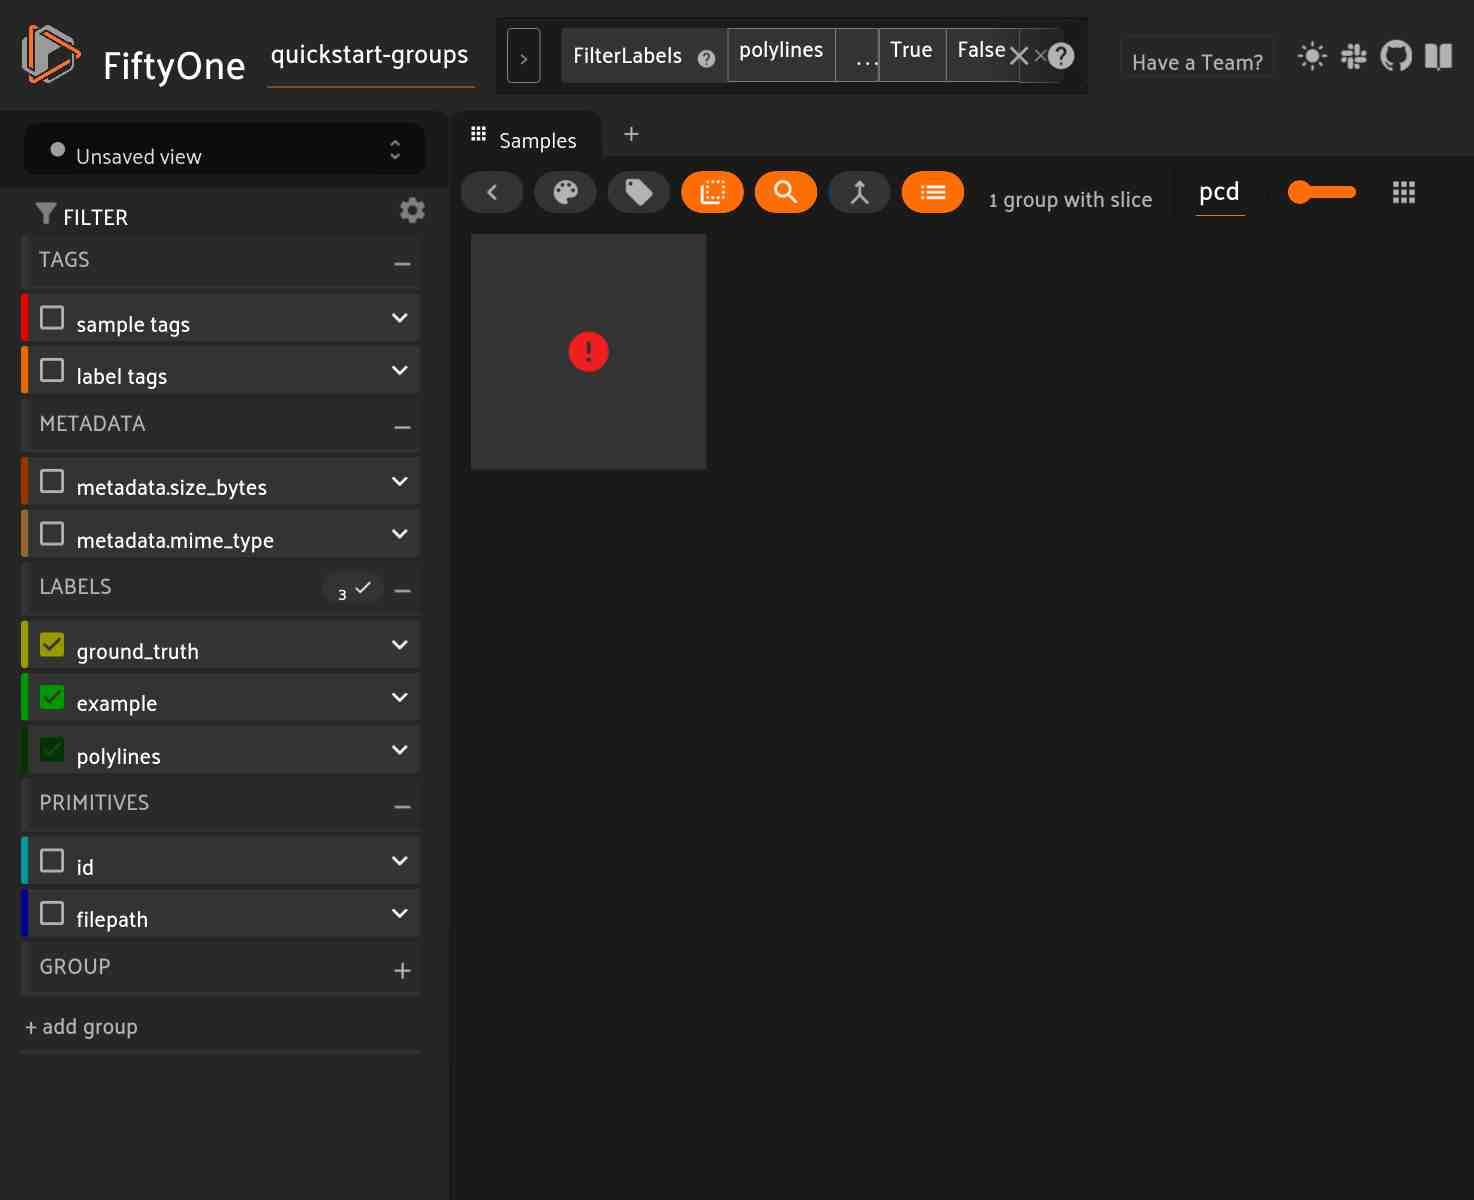

In [5]:
import numpy as np
from fiftyone import ViewField as F
# x = left+right = orange |  y = forward/back = green | z = up+down = blue
bounding_box = fo.Detection(
                label="example",
                location=[0,0,0],
                rotation=[np.pi/4, np.pi/4, 0],
                dimensions=[3,2,1]
                )

sample["example"] = bounding_box
sample.save()
dataset.save()
view =  dataset.filter_labels(
    "example", F("label").is_in(["example"])
)

session.view = view


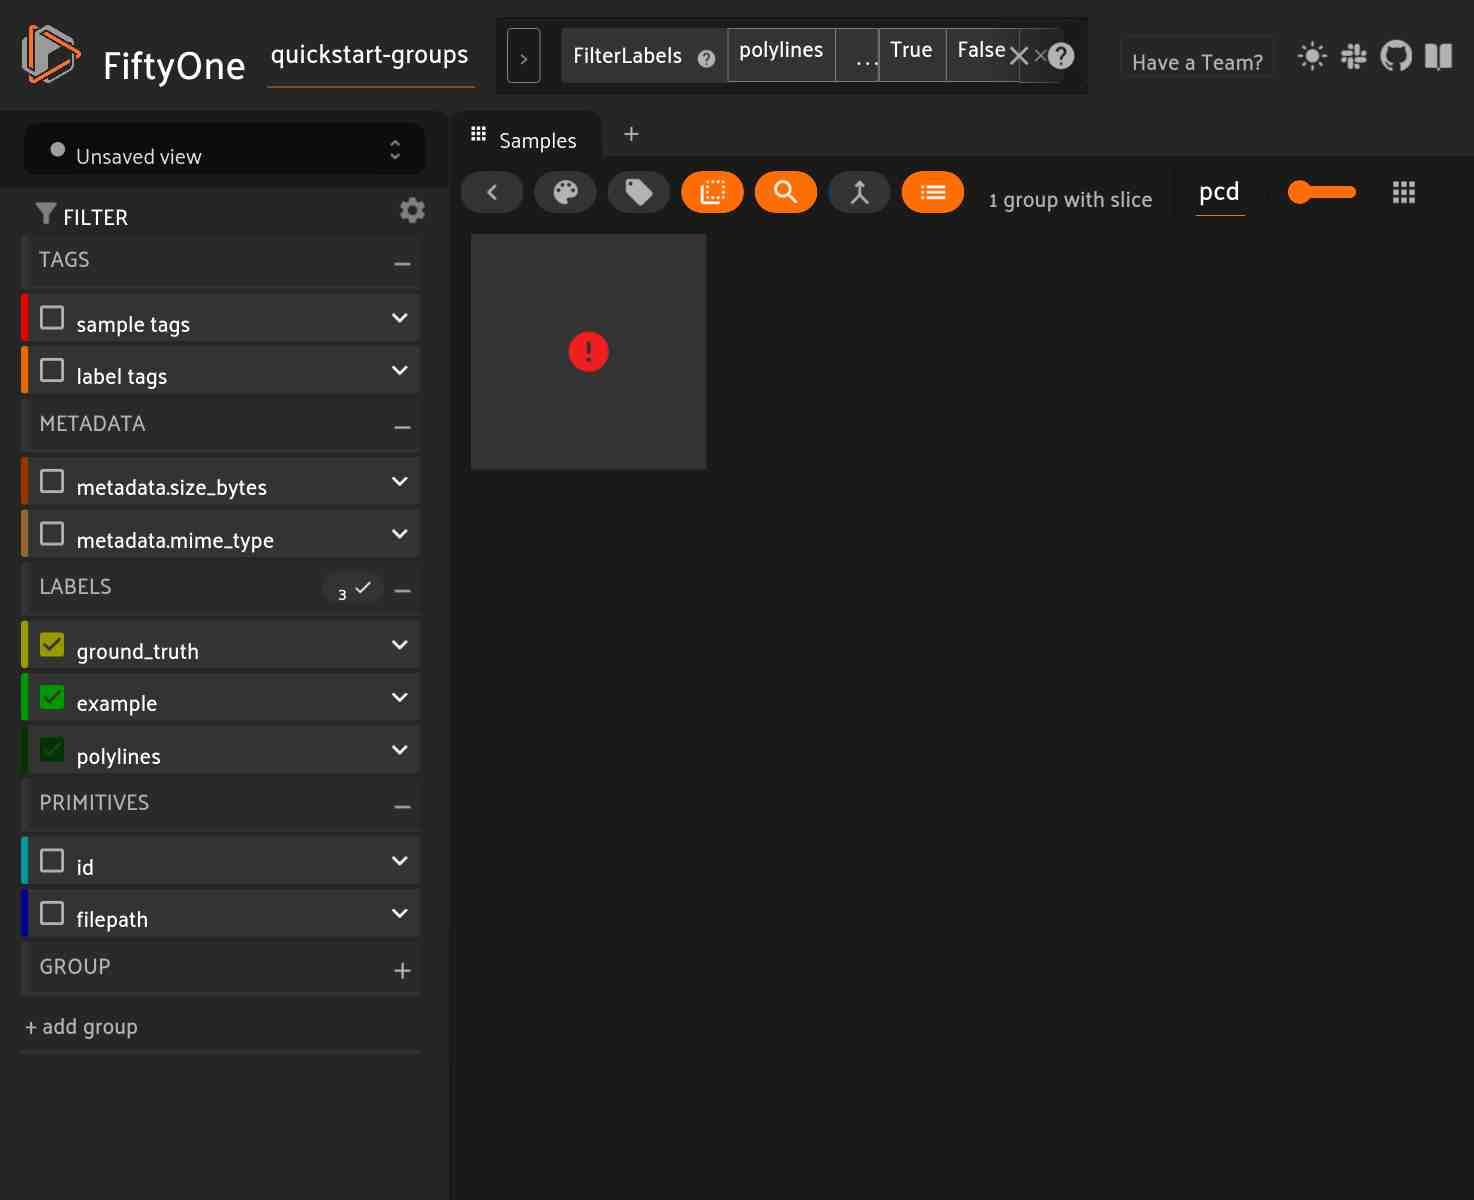

In [6]:
label = "lane"

# A list of lists of `[x, y, z]` points in scene coordinates describing
# the vertices of each shape in the polyline
points3d = [[[1, 1, 1], [0, 2, 2]], [[0, 2, 2], [-1, 1, 1]], [[-1, 1, 1], [1, 1, 1]]]

# A set of semantically related 3D polylines
polyline = fo.Polyline(label=label, points3d=points3d,)

sample["polylines"] = polyline
sample.save()
dataset.save()
view =  dataset.filter_labels(
    "polylines", F("label").is_in(["lane"])
)

session.view = view


In [7]:
import fiftyone.utils.utils3d as fou3d

min_bound = (0, -15, -2.73)
max_bound = (20, 15, 1.27)
size = (-1, 512)
fou3d.compute_orthographic_projection_images(
    dataset,
    size,
    "/tmp/proj",
    shading_mode="height",
    out_group_slice="proj"
)

session.view = dataset.view()



Jupyter environment detected. Enabling Open3D WebVisualizer.                 
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
 100% |█████████████████| 200/200 [12.6s elapsed, 0s remaining, 17.2 samples/s]      
 100% |█████████████████| 200/200 [79.6ms elapsed, 0s remaining, 2.5K samples/s]   
